In [1]:
"""
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed 
and draw inferences.

"""

'\nPerform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed \nand draw inferences.\n\n'

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
US = pd.read_csv("C:/Users/Ashwini/Desktop/ExcelRAssignments/Clustering/crime_data.csv")
US

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
US.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
US.shape

(50, 5)

In [8]:
US.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
US_norm = norm_func(US.iloc[:,1:])
US_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Hierarchical Clustering

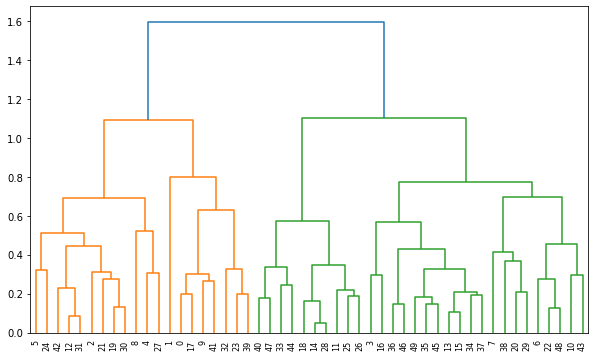

In [11]:
#create dendrogram
plt.figure(figsize = (10,6))
dendrogram = sch.dendrogram(sch.linkage(US_norm, method='complete'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [13]:
y_hc = hc.fit_predict(US_norm)

Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
Clusters.head()

,Clusters
0,3
1,4
2,1
3,5
4,1


In [15]:
US_norm['h_clusterid'] = Clusters

In [16]:
US_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
38,0.156627,0.441781,0.932203,0.025840,0
20,0.216867,0.356164,0.898305,0.232558,0
29,0.397590,0.390411,0.966102,0.297158,0
48,0.108434,0.027397,0.576271,0.090439,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
43,0.144578,0.256849,0.813559,0.403101,0
10,0.271084,0.003425,0.864407,0.333333,0
22,0.114458,0.092466,0.576271,0.196382,0
21,0.680723,0.719178,0.711864,0.718346,1


In [17]:
US['h_clusterid'] = Clusters
US.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,1


In [18]:
US.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
38,Rhode Island,3.4,174,87,8.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
48,Wisconsin,2.6,53,66,10.8,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
43,Utah,3.2,120,80,22.9,0
10,Hawaii,5.3,46,83,20.2,0
22,Minnesota,2.7,72,66,14.9,0
21,Michigan,12.1,255,74,35.1,1


# K Means

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(US_norm)

C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [20]:
kmeans.inertia_

4.31624036457438

In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(US_norm)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(US_norm, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(US_norm, kmeans.labels_))

C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak o

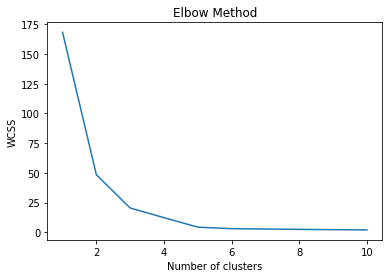

In [22]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans.labels_

array([3, 5, 7, 1, 9, 9, 6, 4, 7, 3, 6, 0, 2, 8, 0, 8, 1, 3, 0, 7, 4, 7,
       6, 3, 2, 0, 0, 9, 0, 4, 7, 2, 3, 0, 8, 8, 8, 8, 4, 3, 0, 3, 2, 4,
       0, 1, 8, 0, 6, 1])

In [24]:
US['clusterid_new'] = kmeans.labels_

In [25]:
US.sort_values('clusterid_new')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
47,West Virginia,5.7,81,39,9.3,2,0
44,Vermont,2.2,48,32,11.2,2,0
40,South Dakota,3.8,86,45,12.8,2,0
33,North Dakota,0.8,45,44,7.3,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
26,Nebraska,4.3,102,62,16.5,2,0
11,Idaho,2.6,120,54,14.2,2,0
25,Montana,6.0,109,53,16.4,2,0
18,Maine,2.1,83,51,7.8,2,0
14,Iowa,2.2,56,57,11.3,2,0


In [26]:
US['clusterid_new'].value_counts()

0    10
3     7
8     7
4     5
7     5
1     4
2     4
6     4
9     3
5     1
Name: clusterid_new, dtype: int64

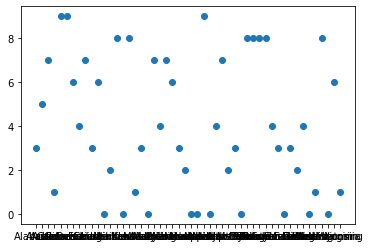

In [27]:
plt.scatter(US['Unnamed: 0'], US['clusterid_new'])

# DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
US.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
array = US.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   3. ,   3. ],
       [ 10. , 263. ,  48. ,  44.5,   4. ,   5. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   7. ],
       [  8.8, 190. ,  50. ,  19.5,   5. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   9. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ,   9. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   6. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   4. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   7. ],
       [ 17.4, 211. ,  60. ,  25.8,   3. ,   3. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   6. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   5. ,   8. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   0. ],
       [  6. , 115. ,  66. ,  18. ,   5. ,   8. ],
       [  9.7, 109. ,  52. ,  16.3,   5. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   3. ,   3. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   0. ],
       [ 11.3, 300. ,  67. ,  2

In [31]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [32]:
dbscan = DBSCAN(eps = 0.8, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=3)

In [33]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  0,  1,  0, -1,
       -1,  1,  3, -1,  3, -1, -1, -1,  2,  2, -1,  1, -1,  3, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
      dtype=int64)

In [34]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [35]:
clustered = pd.concat([US,cl],axis=1)
clustered

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,13.2,236,58,21.2,3,3,-1
1,10.0,263,48,44.5,4,5,-1
2,8.1,294,80,31.0,1,7,-1
3,8.8,190,50,19.5,5,1,-1
4,9.0,276,91,40.6,1,9,-1
5,7.9,204,78,38.7,1,9,-1
6,3.3,110,77,11.1,0,6,-1
7,5.9,238,72,15.8,0,4,-1
8,15.4,335,80,31.9,1,7,-1
9,17.4,211,60,25.8,3,3,-1
